In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score, mean_absolute_error, mean_squared_error
#from sklearn.datasets import lo
from sklearn.inspection import partial_dependence, permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


## Problem 1

In [14]:
df = pd.read_csv('../../data/raw/pca_prac/boston_monthly_avg_temps_1978_2019.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])
df.head()

,TAVG,TAVG_LAG_1,TAVG_LAG_2,TAVG_LAG_3,TAVG_LAG_4,TAVG_LAG_5,TAVG_LAG_6,TAVG_LAG_7,TAVG_LAG_8,TAVG_LAG_9,TAVG_LAG_10,TAVG_LAG_11,TAVG_LAG_12
DATE,,,,,,,,,,,,,
1980-01-31,29.403226,36.629032,48.566667,52.629032,64.883333,71.661290,74.483871,68.166667,61.129032,48.683333,42.451613,23.071429,32.451613
1980-02-29,27.810345,29.403226,36.629032,48.566667,52.629032,64.883333,71.661290,74.483871,68.166667,61.129032,48.683333,42.451613,23.071429
1980-03-31,36.822581,27.810345,29.403226,36.629032,48.566667,52.629032,64.883333,71.661290,74.483871,68.166667,61.129032,48.683333,42.451613
1980-04-30,48.716667,36.822581,27.810345,29.403226,36.629032,48.566667,52.629032,64.883333,71.661290,74.483871,68.166667,61.129032,48.683333
1980-05-31,59.387097,48.716667,36.822581,27.810345,29.403226,36.629032,48.566667,52.629032,64.883333,71.661290,74.483871,68.166667,61.129032


In [15]:
scaler = StandardScaler()
st_df = scaler.fit_transform(df)


In [16]:
#Carve out the test and the training data sets
split_index = round(len(df)*0.8)
split_date = df.index[split_index]
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

In [17]:
X_train = df_train.iloc[:,1:]
X_test = df_test.iloc[:,1:]
y_train = pd.DataFrame(df_train.iloc[:,0])
y_test = pd.DataFrame(df_test.iloc[:,0])

In [18]:
y_train.array.reshape(-1,1)

AttributeError: 'DataFrame' object has no attribute 'array'

In [19]:
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train)
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train)
X_test = scalerX.transform(X_test)
y_test = scalery.transform(y_test)

In [20]:
#y_new_inverse = scalery.inverse_transform(y_new)

In [21]:
?PCA

Init signature:
PCA(
    n_components=None,
    *,
    copy=True,
    whiten=False,
    svd_solver='auto',
    tol=0.0,
    iterated_power='auto',
    n_oversamples=10,
    power_iteration_normalizer='auto',
    random_state=None,
)
Docstring:     
Principal component analysis (PCA).

Linear dimensionality reduction using Singular Value Decomposition of the
data to project it to a lower dimensional space. The input data is centered
but not scaled for each feature before applying the SVD.

It uses the LAPACK implementation of the full SVD or a randomized truncated
SVD by the method of Halko et al. 2009, depending on the shape of the input
data and the number of components to extract.

It can also use the scipy.sparse.linalg ARPACK implementation of the
truncated SVD.

Notice that this class does not support sparse input. See
:class:`TruncatedSVD` for an alternative with sparse data.

Read more in the :ref:`User Guide <PCA>`.

Parameters
----------
n_components : int, float or 'mle', def

In [22]:
X_train

array([[-0.96401558, -0.19784571,  0.06495062, ..., -0.59531881,
        -1.83885402, -1.23614325],
       [-1.42688367, -0.96264395, -0.19565024, ..., -0.19445925,
        -0.59380422, -1.83873055],
       [-1.52891986, -1.42557353, -0.9614498 , ...,  0.60611862,
        -0.19345703, -0.5937387 ],
       ...,
       [ 1.42368114,  1.64340158,  0.99219441, ..., -0.44532934,
         0.25068623,  1.08925759],
       [ 0.99962648,  1.42537001,  1.64800772, ..., -1.22405032,
        -0.44400646,  0.25071243],
       [ 0.37499565,  1.00125901,  1.42969069, ..., -1.55294122,
        -1.22173208, -0.44394792]])

In [25]:
pca = PCA()
pc_res = pca.fit_transform(X_train)

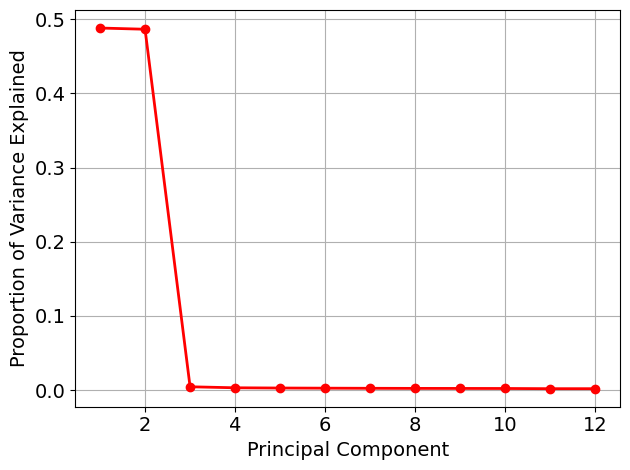

In [26]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
#plt.title('Scree Plot')
plt.xlabel('Principal Component', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Proportion of Variance Explained', fontsize=14)
plt.grid(True)
plt.tight_layout()
#plt.savefig('../../Exams/Midterm-2-S2023/Midterm-2-Questions-S2023/images/scree.png')

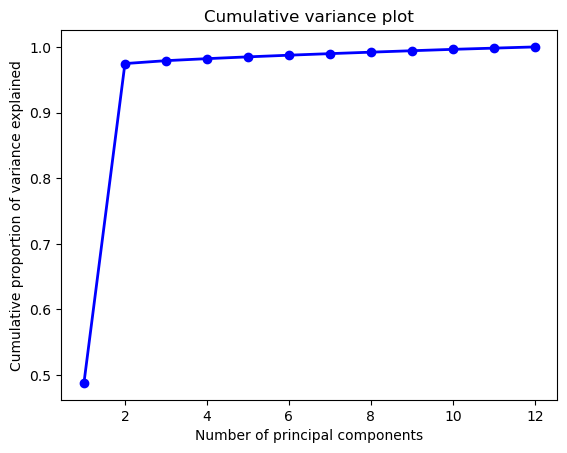

In [27]:
cpve = np.cumsum(pca.explained_variance_ratio_)
plt.plot(PC_values, cpve, 'bo-', linewidth=2)
plt.title('Cumulative variance plot')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative proportion of variance explained')
plt.show()

In [28]:
cpve

array([0.48813042, 0.97463116, 0.97905309, 0.9821168 , 0.9848513 ,
       0.98739529, 0.98976573, 0.99200987, 0.99419955, 0.99631199,
       0.99815865, 1.        ])

In [29]:
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6'])

NameError: name 'Principal_components' is not defined

In [30]:
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7',
       'pca8', 'pca9', 'pca10', 'pca11'], dtype=object)

In [31]:
X_train@pca.components_.T

array([[-7.99631836e-01, -3.34043803e+00,  8.06378286e-02, ...,
         4.96124715e-01, -3.74545940e-02, -2.58448556e-02],
       [-2.41905666e+00, -2.53949687e+00,  7.27085609e-02, ...,
        -2.99748167e-01,  7.37817676e-02,  6.34671080e-02],
       [-3.25988600e+00, -9.12227896e-01,  1.38637659e-01, ...,
         2.65790745e-01, -4.57115696e-02, -1.05354431e-01],
       ...,
       [ 3.54151212e+00,  1.04998316e+00,  1.09668184e-01, ...,
         1.17650404e-01,  8.29541739e-05,  1.01705913e-01],
       [ 3.56939681e+00, -8.86559415e-01,  8.93141173e-02, ...,
        -1.19762442e-01,  1.06470197e-01, -4.96967799e-02],
       [ 2.69553844e+00, -2.52489360e+00,  1.20552618e-01, ...,
         9.17008937e-02, -1.06815924e-01, -6.75696129e-02]])

In [32]:
pca.transform(X_train)

array([[-7.99631836e-01, -3.34043803e+00,  8.06378286e-02, ...,
         4.96124715e-01, -3.74545940e-02, -2.58448556e-02],
       [-2.41905666e+00, -2.53949687e+00,  7.27085609e-02, ...,
        -2.99748167e-01,  7.37817676e-02,  6.34671080e-02],
       [-3.25988600e+00, -9.12227896e-01,  1.38637659e-01, ...,
         2.65790745e-01, -4.57115696e-02, -1.05354431e-01],
       ...,
       [ 3.54151212e+00,  1.04998316e+00,  1.09668184e-01, ...,
         1.17650404e-01,  8.29541739e-05,  1.01705913e-01],
       [ 3.56939681e+00, -8.86559415e-01,  8.93141173e-02, ...,
        -1.19762442e-01,  1.06470197e-01, -4.96967799e-02],
       [ 2.69553844e+00, -2.52489360e+00,  1.20552618e-01, ...,
         9.17008937e-02, -1.06815924e-01, -6.75696129e-02]])

In [33]:
X_train

array([[-0.96401558, -0.19784571,  0.06495062, ..., -0.59531881,
        -1.83885402, -1.23614325],
       [-1.42688367, -0.96264395, -0.19565024, ..., -0.19445925,
        -0.59380422, -1.83873055],
       [-1.52891986, -1.42557353, -0.9614498 , ...,  0.60611862,
        -0.19345703, -0.5937387 ],
       ...,
       [ 1.42368114,  1.64340158,  0.99219441, ..., -0.44532934,
         0.25068623,  1.08925759],
       [ 0.99962648,  1.42537001,  1.64800772, ..., -1.22405032,
        -0.44400646,  0.25071243],
       [ 0.37499565,  1.00125901,  1.42969069, ..., -1.55294122,
        -1.22173208, -0.44394792]])

In [34]:
pc_res

array([[-7.99631836e-01, -3.34043803e+00,  8.06378286e-02, ...,
         4.96124715e-01, -3.74545940e-02, -2.58448556e-02],
       [-2.41905666e+00, -2.53949687e+00,  7.27085609e-02, ...,
        -2.99748167e-01,  7.37817676e-02,  6.34671080e-02],
       [-3.25988600e+00, -9.12227896e-01,  1.38637659e-01, ...,
         2.65790745e-01, -4.57115696e-02, -1.05354431e-01],
       ...,
       [ 3.54151212e+00,  1.04998316e+00,  1.09668184e-01, ...,
         1.17650404e-01,  8.29541739e-05,  1.01705913e-01],
       [ 3.56939681e+00, -8.86559415e-01,  8.93141173e-02, ...,
        -1.19762442e-01,  1.06470197e-01, -4.96967799e-02],
       [ 2.69553844e+00, -2.52489360e+00,  1.20552618e-01, ...,
         9.17008937e-02, -1.06815924e-01, -6.75696129e-02]])

In [35]:
pca.transform(X_test)

array([[ 1.19637311, -3.44792711,  0.22260183, ..., -0.16133799,
        -0.06556829,  0.1161602 ],
       [-0.5267492 , -3.46776976,  0.37218846, ...,  0.04286163,
         0.0718797 , -0.01376136],
       [-2.04530921, -2.6342359 ,  0.50243503, ..., -0.06863762,
        -0.11984456, -0.06944421],
       ...,
       [ 2.46938586,  2.59625893,  0.3568204 , ..., -0.07920657,
        -0.09630646,  0.06518406],
       [ 3.37123781,  0.95744361,  0.3071078 , ...,  0.07752432,
         0.18178297,  0.07182753],
       [ 3.38257808, -0.8759453 ,  0.31671021, ...,  0.02489898,
         0.06362716, -0.1705912 ]])

### PCR

In [297]:
pca2 = PCA(n_components=2,whiten=False)
pca2.fit(X_train)

Z_train_pca2 = pca2.transform(X_train)
PC_values = np.arange(pca2.n_components) + 1

Z_test = pca2.transform(X_test)
lm = LinearRegression()
pcr = lm.fit(Z_train_pca2, y_train)
y_pred = pcr.predict(Z_test)
y_pred_inv = scalery.inverse_transform(y_pred)
y_test_inv = scalery.inverse_transform(y_test)
mean_absolute_error(y_test_inv, y_pred_inv)

2.8319593275766124

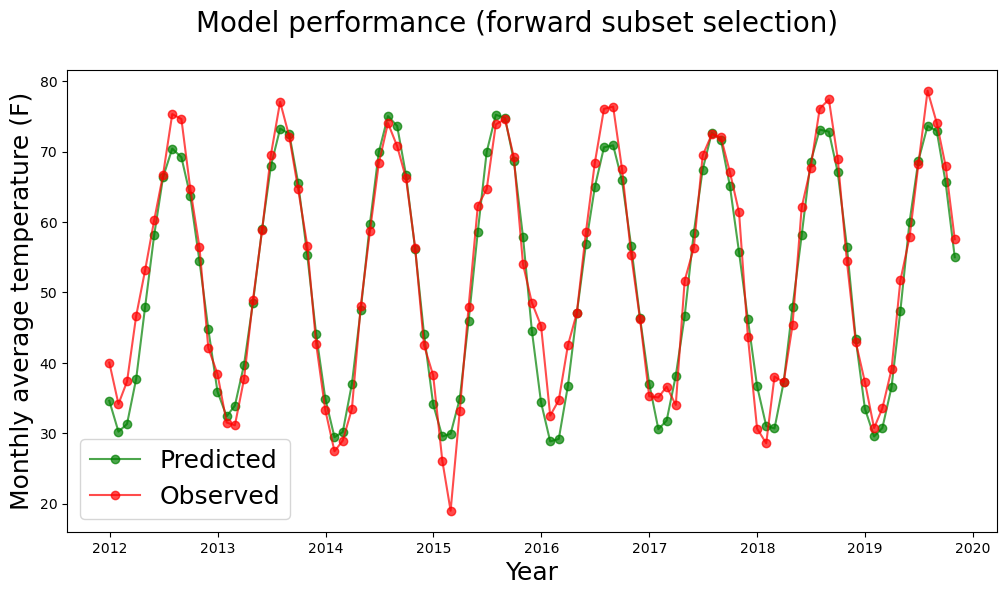

In [298]:
fig = plt.figure(figsize=(12,6))
fig.suptitle('Model performance (pcr)',fontsize=20)
predicted, = plt.plot(df_test.index, y_pred_inv, 'go-', label='Predicted',alpha=.7)
actual, = plt.plot(df_test.index, y_test_inv, 'ro-', label='Observed',alpha=.7)
plt.legend(handles=[predicted, actual],fontsize=18)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Monthly average temperature (F)',fontsize=18)
plt.show()

<BarContainer object of 12 artists>

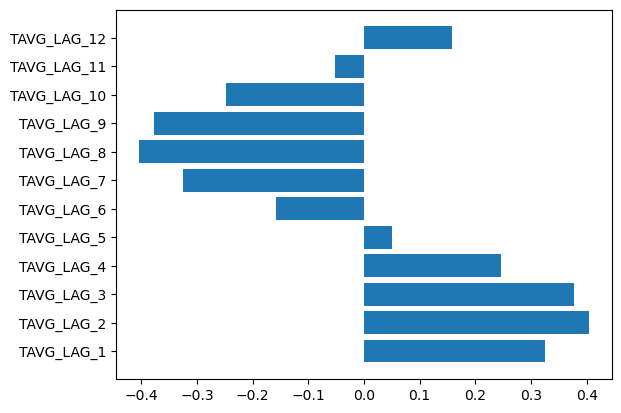

In [299]:
plt.barh(df_train.columns[1:], pca2.components_[0])

<BarContainer object of 12 artists>

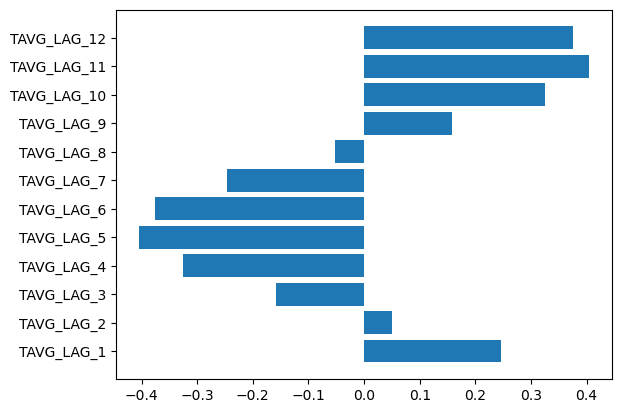

In [300]:
plt.barh(df_train.columns[1:], pca2.components_[1])

In [308]:
Z_train_pca2[:,0]

array([-0.79963184, -2.41905666, -3.259886  , -3.39278928, -2.55895429,
       -1.07537841,  0.67588583,  2.29268586,  3.33369345,  3.49966248,
        2.7022306 ,  1.03041347, -1.01071351, -2.86543843, -3.6915242 ,
       -3.56876445, -2.45058577, -0.6832272 ,  1.34852987,  2.94845286,
        3.72676402,  3.46003018,  2.27523288,  0.54697775, -1.25819646,
       -2.74175769, -3.62126823, -3.48394642, -2.4813838 , -0.83234244,
        0.91236237,  2.49281138,  3.36566347,  3.36479599,  2.52108015,
        1.04984398, -0.60818912, -1.99320067, -2.88678879, -2.98626878,
       -2.28625968, -0.9741664 ,  0.75104992,  2.26469958,  3.20959879,
        3.39809727,  2.63039043,  1.11507624, -0.83733277, -2.58474908,
       -3.49369457, -3.6977106 , -2.8842139 , -1.26980406,  0.68015098,
        2.3829929 ,  3.50109108,  3.49426683,  2.59768204,  0.99273608,
       -0.70688443, -2.34057037, -3.42254212, -3.36165394, -2.42034214,
       -0.83554504,  0.84348545,  2.32880243,  3.11372372,  3.17

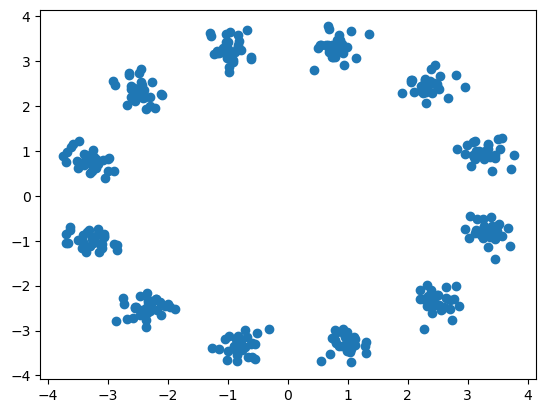

In [309]:
plt.scatter(Z_train_pca2[:,0], Z_train_pca2[:,1])

### Kernel PCA and Kernel PCR

In [369]:
#pca2 = PCA(n_components=2,whiten=False)

kpca = KernelPCA(n_components=2, kernel = "cosine")
kpca_res = kpca.fit_transform(X_train)
KPC_values = np.arange(kpca.n_components) + 1

Z_test = kpca.transform(X_test)
#cpve2 = np.cumsum(pca2.explained_variance_ratio)
# plt.plot(PC_values, cpve2, 'bo-', linewidth=2)
# plt.title('Cumulative variance plot')
# plt.xlabel('Number of principal components')
# plt.ylabel('Cumulative proportion of variance explained')
# plt.show()

In [370]:
lm = LinearRegression()
pcr = lm.fit(kpca_res, y_train)

In [371]:
y_pred = pcr.predict(Z_test)
y_pred_inv = scalery.inverse_transform(y_pred)
y_test_inv = scalery.inverse_transform(y_test)
mean_absolute_error(y_test_inv, y_pred_inv)

2.6388543834848495

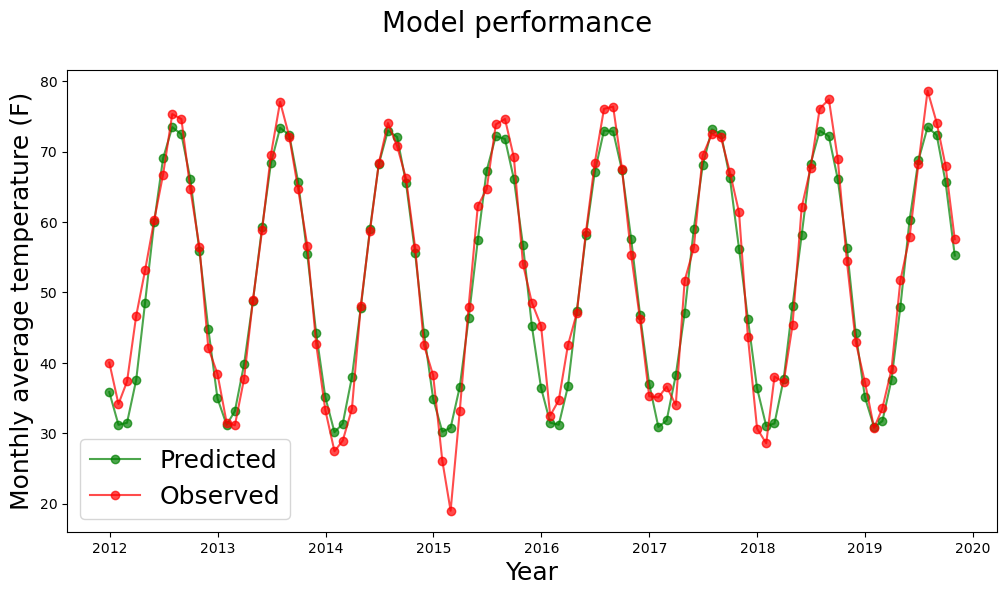

In [351]:
#Plot the actual versus predicted values of TAVG on the test data set
fig = plt.figure(figsize=(12,6))
fig.suptitle('Model performance',fontsize=20)
predicted, = plt.plot(df_test.index, y_pred_inv, 'go-', label='Predicted',alpha=.7)
actual, = plt.plot(df_test.index, y_test_inv, 'ro-', label='Observed',alpha=.7)
plt.legend(handles=[predicted, actual],fontsize=18)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Monthly average temperature (F)',fontsize=18)
plt.show()

In [257]:
cpve2

array([187.04559146, 373.29413548, 375.05607758])

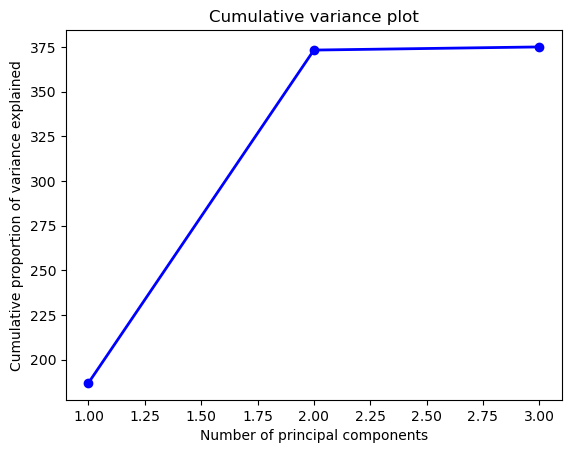

In [352]:
cpve2 = np.cumsum(kpca.eigenvalues_)
plt.plot([1,2,3], cpve2, 'bo-', linewidth=2)
plt.title('Cumulative variance plot')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative proportion of variance explained')
plt.show()

In [185]:
df_train.columns

Index(['TAVG', 'TAVG_LAG_1', 'TAVG_LAG_2', 'TAVG_LAG_3', 'TAVG_LAG_4',
       'TAVG_LAG_5', 'TAVG_LAG_6', 'TAVG_LAG_7', 'TAVG_LAG_8', 'TAVG_LAG_9',
       'TAVG_LAG_10', 'TAVG_LAG_11', 'TAVG_LAG_12'],
      dtype='object')

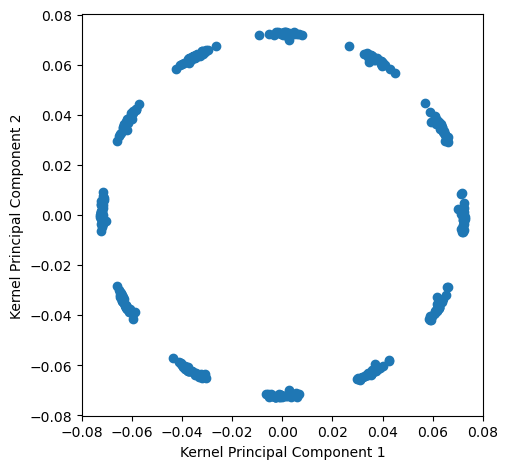

In [353]:
#plt.figure(figsize=(5,5))
fig, axs = plt.subplots()
plt.scatter(kpca.eigenvectors_.T[0], kpca.eigenvectors_.T[1])
plt.ylabel('Kernel Principal Component 2')
plt.xlabel('Kernel Principal Component 1')
axs.set_aspect('equal','box')
plt.tight_layout()
plt.savefig('../../Exams/Midterm-2-S2023/Midterm-2-Questions-S2023/images/kpca-manifold.png')

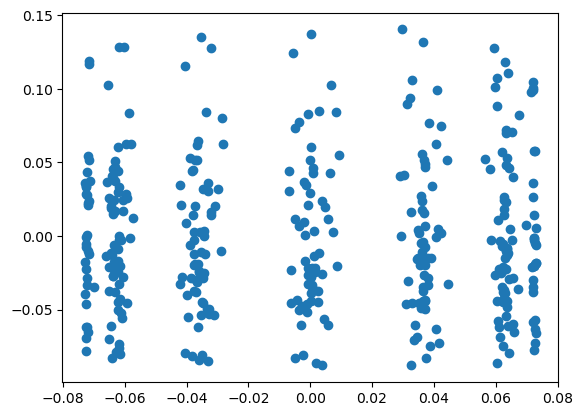

In [356]:
plt.scatter(kpca.eigenvectors_.T[1], kpca.eigenvectors_.T[2])

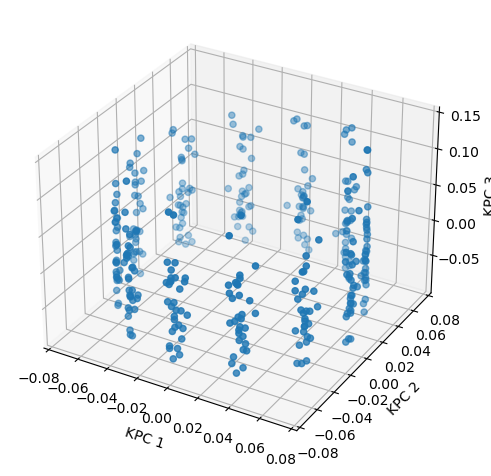

In [368]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(kpca.eigenvectors_.T[0], kpca.eigenvectors_.T[1], kpca.eigenvectors_.T[2] )
ax.set_xlabel('KPC 1')
ax.set_ylabel('KPC 2')
ax.set_zlabel('KPC 3')
plt.tight_layout()

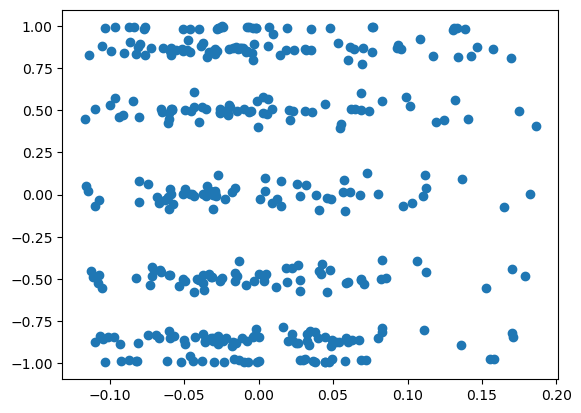

In [325]:
plt.scatter(pc2_res[:,2], pc2_res[:,1])